In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

In [2]:
from metagov import govbase
from metagov.plotutils import plot_coded_column as _plot_coded_column
from metagov.utils import get_unique_col_values, print_groupby

kw_plot = {'scaleToMax': False}
def plot_coded_column(df, name, label=None):
    _plot_coded_column(df, name, label=label, **kw_plot)

## Goals
- Identify degree of adaptivity: raw numbers/types of self-governance mechanisms and parameters, and what kinds of "degrees of freedom" they afford
- Identify degree of autonomy: ability to self-govern (System 5 of Viable System Model)

## Import data and check what's generally in it

In [3]:
data = govbase.load_data_from_contract_tables()
df_objects, df_params = data.values()

In [4]:
df_objects.head()

,contract,type,inheritance,visibility,project,description,object_name,contract_parameters,hand_coding,object_id,...,modifiers,values,contract_parameters_names,dispute_resolution,election,membership,meta,proposal,reputation,voting
id,,,,,,,,,,,,,,,,,,,,,
recoLQ7q54IdNJEsJ,CommonStorage,ContractDefinition,[DSAuth],,Colony - Colony Network,ignore-file-swc-131\nignore-file-swc-108,CommonStorage,"[recEcLkjBIBM2Y5YT, recVsW2krM7UuagVx, recyFXB...",[membership],CommonStorage: CommonStorage (JoinColony/colo...,...,NaN,NaN,"[UINT256_MAX, AUTHORITY_SLOT, OWNER_SLOT, RESO...",0,0,1,0,0,0,0
rec918lQeIeyoyxja,ContractRecovery,FunctionDefinition,NaN,public,Colony - Colony Network,NaN,approveExitRecovery,NaN,[membership],ContractRecovery: approveExitRecovery (JoinCo...,...,"[recovery, auth]",[],NaN,0,0,1,0,0,0,0
recXwa9USIDVfYP12,ContractRecovery,FunctionDefinition,NaN,public,Colony - Colony Network,Can only be called by the root role,setRecoveryRole,[recNXPpVtY9FZ1bzS],[membership],ContractRecovery: setRecoveryRole (JoinColony...,...,"[stoppable, auth]",[],[_user],0,0,1,0,0,0,0
recmtcdwC95Fbkl3v,ContractRecovery,FunctionDefinition,NaN,public,Colony - Colony Network,Can only be called by the root role,removeRecoveryRole,[recVPDgSaIhAd9GzA],[membership],ContractRecovery: removeRecoveryRole (JoinCol...,...,"[stoppable, auth]",[],[_user],0,0,1,0,0,0,0
recGhCmYVvyVLn3pL,ContractRecovery,FunctionDefinition,NaN,public,Colony - Colony Network,NaN,numRecoveryRoles,NaN,[membership],ContractRecovery: numRecoveryRoles (JoinColon...,...,[],[],NaN,0,0,1,0,0,0,0


In [5]:
KEYWORDS = get_unique_col_values(df_objects, 'hand_coding')

dispute_resolution
election
membership
meta
proposal
reputation
voting


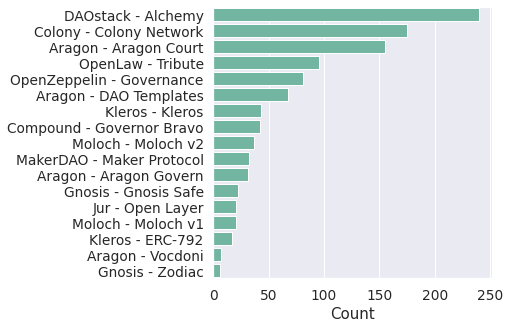

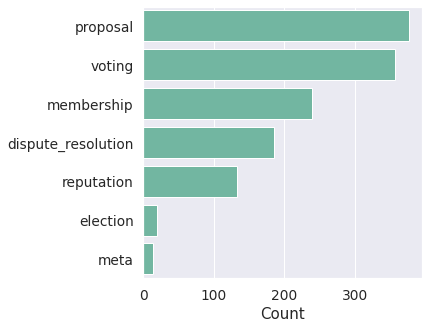

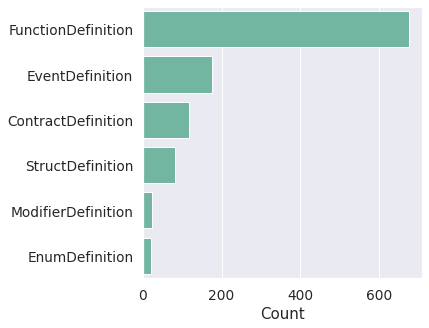

In [6]:
plot_coded_column(df_objects, 'project')
plot_coded_column(df_objects, 'hand_coding')
plot_coded_column(df_objects, 'type')

In [7]:
print(f"Including data from {len(df_objects['project'].unique())} projects")
print(f"Found {len(df_objects.index)} keyword-coded contract objects and {len(df_params.index)} parameters")
print(f"Keywords include: {', '.join(KEYWORDS)}")

Including data from 17 projects
Found 1094 keyword-coded contract objects and 3819 parameters
Keywords include: dispute_resolution, election, membership, meta, proposal, reputation, voting


In [8]:
df_params.head()

,parameter_name,contract,object_name,visibility,description,type_category,type,object_id,hand_coding_from_object,project
id,,,,,,,,,,
recJoPGJe4per156W,termRandomness,JurorsRegistry,DraftParams,,Randomness seed to be used for the draft,bytes,bytes32,recKevkh70FBHGVVM,"[dispute_resolution, election]",Aragon - Aragon Court
recuddMFdFT33eRZU,disputeId,JurorsRegistry,DraftParams,,ID of the dispute being drafted,uint,uint256,recKevkh70FBHGVVM,"[dispute_resolution, election]",Aragon - Aragon Court
recKtUAJOBvvgHwLg,termId,JurorsRegistry,DraftParams,,Term ID of the dispute's draft term,uint,uint64,recKevkh70FBHGVVM,"[dispute_resolution, election]",Aragon - Aragon Court
rec5IwiDrths5mfhn,selectedJurors,JurorsRegistry,DraftParams,,Number of jurors already selected for the draft,uint,uint256,recKevkh70FBHGVVM,"[dispute_resolution, election]",Aragon - Aragon Court
recsMoLogv5hFwhBZ,batchRequestedJurors,JurorsRegistry,DraftParams,,Number of jurors to be selected in the given b...,uint,uint256,recKevkh70FBHGVVM,"[dispute_resolution, election]",Aragon - Aragon Court


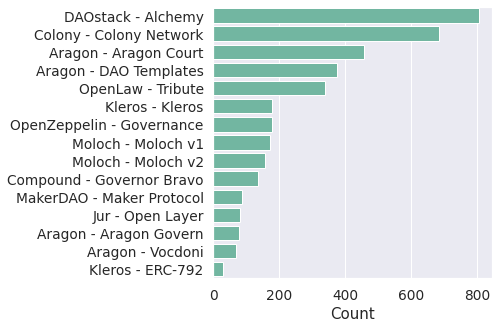

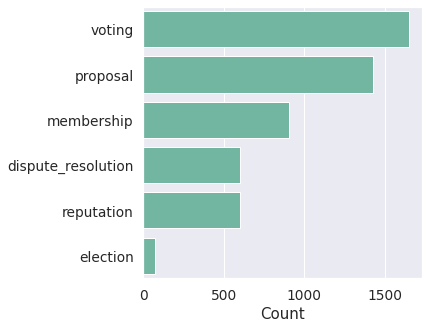

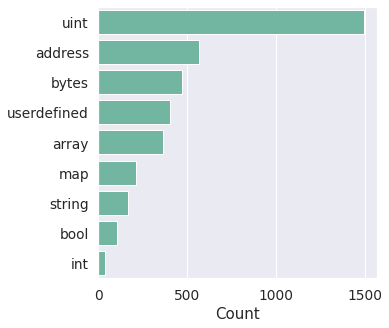

In [9]:
plot_coded_column(df_params, 'project')
plot_coded_column(df_params, 'hand_coding_from_object')
plot_coded_column(df_params, 'type_category')

## By object type

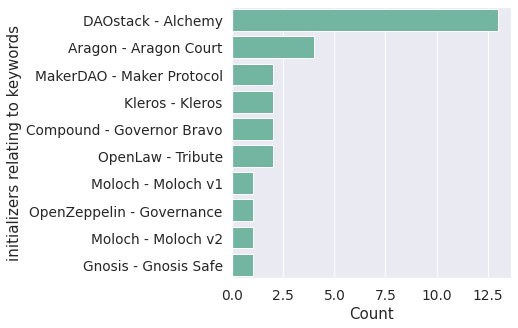

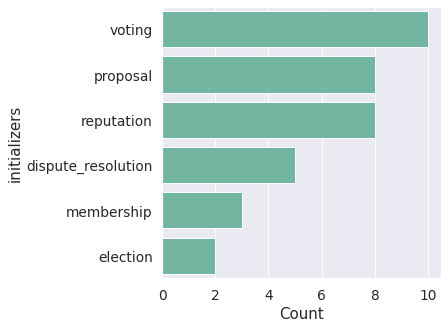

In [10]:
df_init = df_objects[df_objects['object_name'].isin(['constructor', 'initialize'])]
plot_coded_column(df_init, 'project', label='initializers relating to keywords')
plot_coded_column(df_init, 'hand_coding', label='initializers')

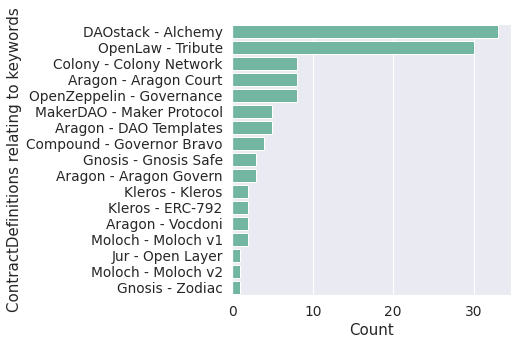

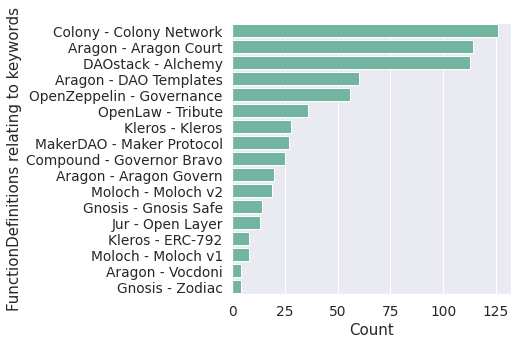

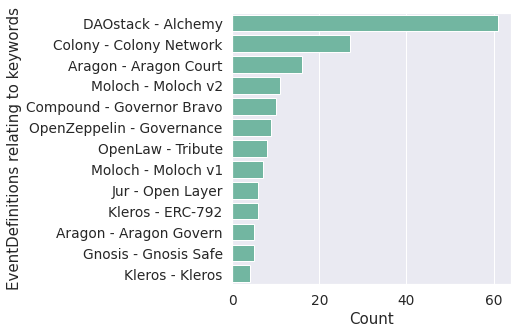

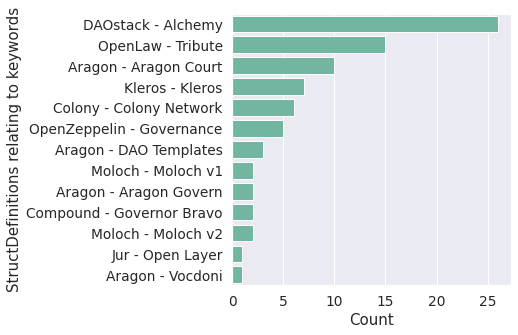

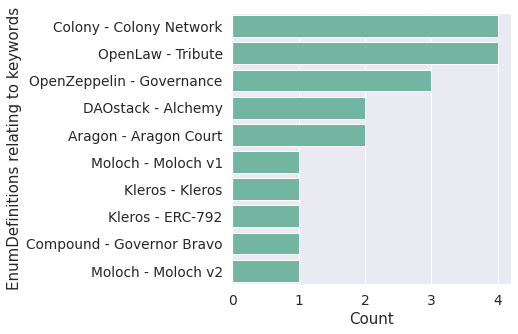

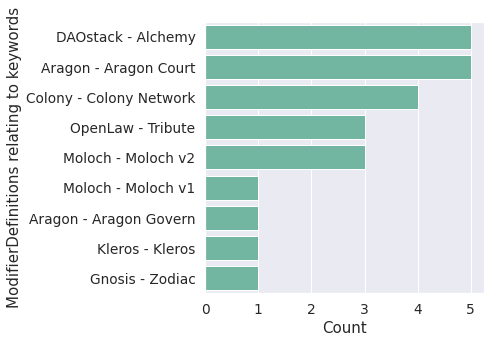

In [11]:
dfs_by_type = {
    t: df_objects[df_objects['type'] == t] for t in df_objects.type.unique()
}

for t, df in dfs_by_type.items():
    plot_coded_column(df, 'project', label=f'{t}s relating to keywords')


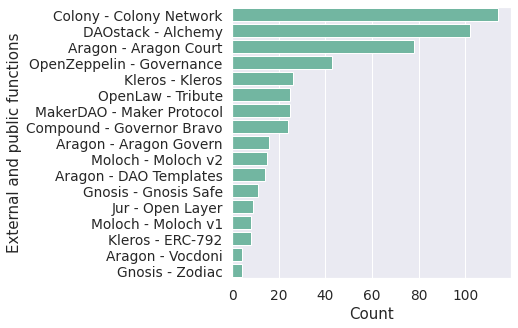

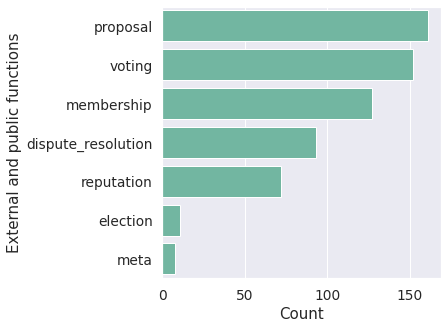

In [12]:
df_functions = dfs_by_type['FunctionDefinition']
df_ext_funcs = df_functions[df_functions['visibility'].isin(['external', 'public'])]
plot_coded_column(df_ext_funcs, 'project', label='External and public functions')
plot_coded_column(df_ext_funcs, 'hand_coding', label='External and public functions')

In [13]:
# Configurable parameters at initialization of governance smart contracts
df_init.sort_values(by='project', inplace=True)
for i, row in df_init.iterrows():
    params = row['contract_parameters']
    print(f"{row['project']}, {row['contract']}:")
    if isinstance(params, list):
        parameterNames = [df_params.loc[ref, 'parameter_name'] for ref in params]
        print("\t" + "\n\t".join(parameterNames) + "\n")
    else:
        print("\tNone\n")

Aragon - Aragon Court, CourtConfig:
	_feeToken
	_fees
	_roundStateDurations
	_pcts
	_roundParams
	_appealCollateralParams
	_minActiveBalance

Aragon - Aragon Court, AragonCourt:
	_termParams
	_governors
	_feeToken
	_fees
	_roundStateDurations
	_pcts
	_roundParams
	_appealCollateralParams
	_minActiveBalance

Aragon - Aragon Court, DisputeManager:
	_controller
	_maxJurorsPerDraftBatch
	_skippedDisputes

Aragon - Aragon Court, Controller:
	_termParams
	_governors
	_feeToken
	_fees
	_roundStateDurations
	_pcts
	_roundParams
	_appealCollateralParams
	_minActiveBalance

Compound - Governor Bravo, GovernorBravoDelegator:
	timelock_
	comp_
	admin_
	implementation_
	votingPeriod_
	votingDelay_
	proposalThreshold_

Compound - Governor Bravo, GovernorBravoDelegate:
	timelock_
	comp_
	votingPeriod_
	votingDelay_
	proposalThreshold_

DAOstack - Alchemy, GenesisProtocolLogic:
	_stakingToken

DAOstack - Alchemy, SignalScheme:
	_avatar
	_signalType
	_voteApproveParams
	_intVote

DAOstack - Alchemy, Fi

/tmp/ipykernel_21910/2760519353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_init.sort_values(by='project', inplace=True)


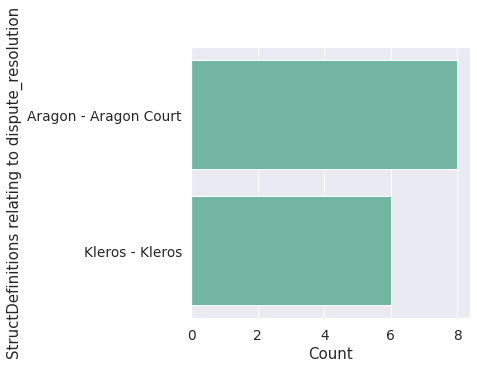

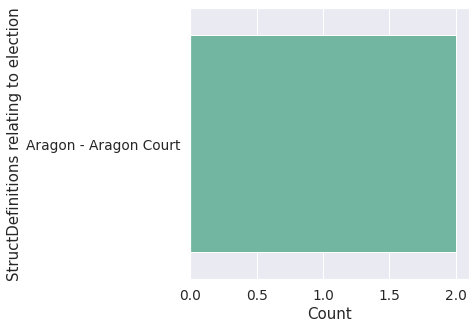

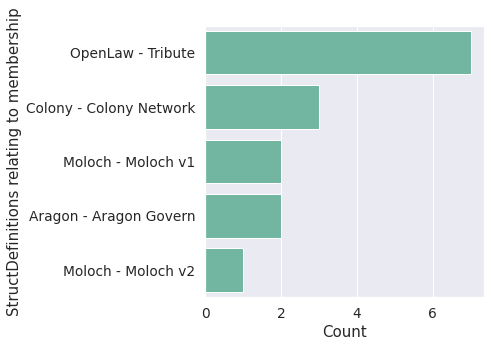

<Figure size 360x360 with 0 Axes>

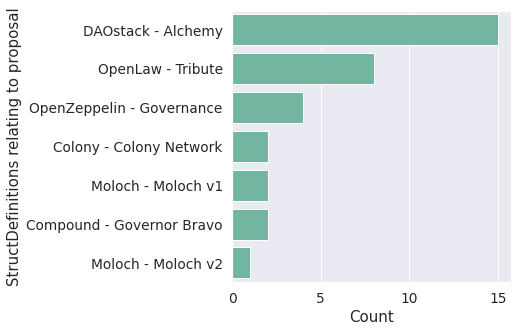

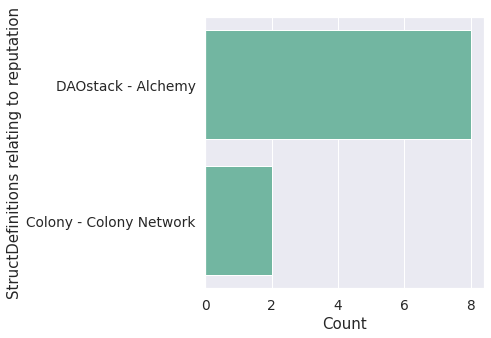

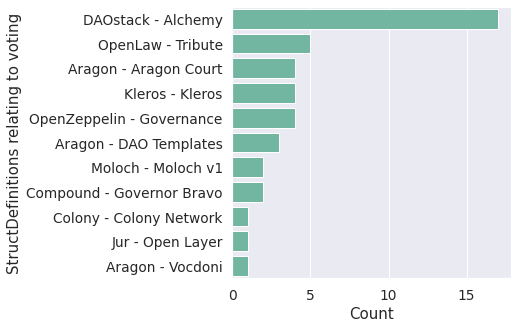

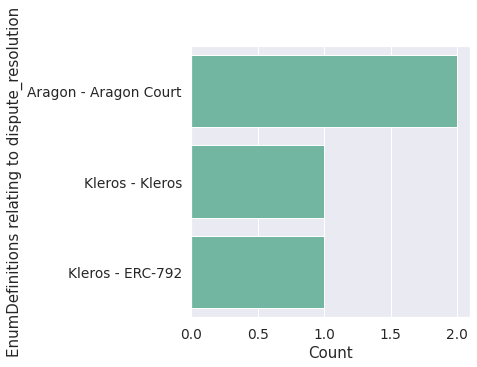

<Figure size 360x360 with 0 Axes>

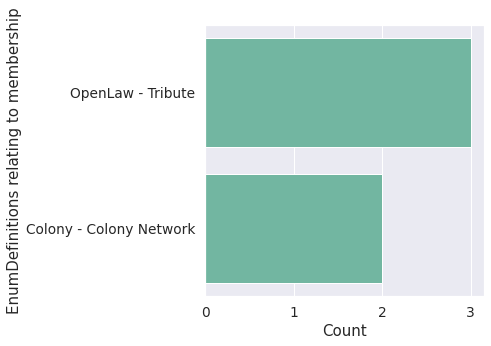

<Figure size 360x360 with 0 Axes>

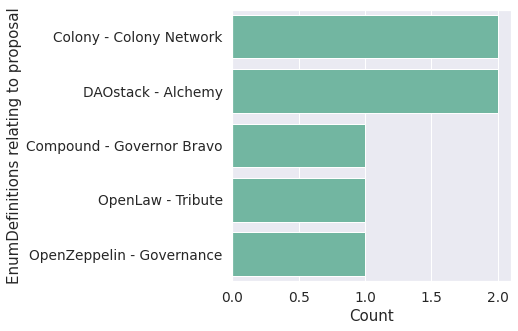

<Figure size 360x360 with 0 Axes>

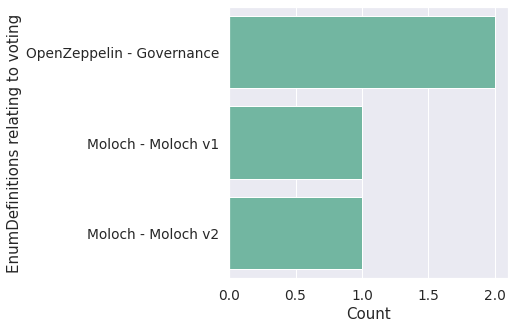

In [14]:
for t, df in dfs_by_type.items():
    if t in ['StructDefinition', 'EnumDefinition']:
        for kw in KEYWORDS:
            try:
                plot_coded_column(df[df[kw] == 1], 'project', label=f'{t}s relating to {kw}')
            except ValueError:
                pass # None found

In [15]:
# How many parameters does it take to define an individual proposal? (Or in some cases, the proposal generation process overall?)
df_tmp = dfs_by_type['StructDefinition']
for kw in ['proposal']:
    try:
        df_kw = df_tmp[df_tmp[kw] == 1]
        df_kw['parameter_count'] = df_kw['contract_parameters'].apply(len)
        gb_kw = df_kw[['project', 'contract', 'object_name', 'parameter_count']].groupby(by='project')
        print_groupby(gb_kw)
    except ValueError:
        pass # None found

Colony - Colony Network
                                   project          contract object_name  \
id                                                                         
rec5RQERADL8o8j9u  Colony - Colony Network      FundingQueue    Proposal   
recbFCyZl2mkwl0lV  Colony - Colony Network  VotingReputation      Motion   

                   parameter_count  
id                                  
rec5RQERADL8o8j9u               13  
recbFCyZl2mkwl0lV               14   

Compound - Governor Bravo
                                     project                        contract  \
id                                                                             
recUA2TU5CybmQjWf  Compound - Governor Bravo  GovernorBravoDelegateStorageV1   
recHyASdx2BoY81I4  Compound - Governor Bravo  GovernorBravoDelegateStorageV1   

                  object_name  parameter_count  
id                                              
recUA2TU5CybmQjWf    Proposal               15  
recHyASdx2BoY81I4     Recei

/tmp/ipykernel_21910/3429132991.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kw['parameter_count'] = df_kw['contract_parameters'].apply(len)


In [16]:
# How many states can a proposal be in?
df_tmp = dfs_by_type['EnumDefinition']
for kw in ['proposal']:
    try:
        df_kw = df_tmp[df_tmp[kw] == 1]
        df_kw['parameter_count'] = df_kw['values'].apply(len)
        gb_kw = df_kw[['project', 'contract', 'object_name', 'parameter_count']].groupby(by='project')
        print_groupby(gb_kw)
    except ValueError:
        pass # None found

Colony - Colony Network
                                   project          contract    object_name  \
id                                                                            
recGT9IwgUYcMXELT  Colony - Colony Network      FundingQueue  ProposalState   
recs8Jd7b2fBydQUf  Colony - Colony Network  VotingReputation    MotionState   

                   parameter_count  
id                                  
recGT9IwgUYcMXELT                4  
recs8Jd7b2fBydQUf                8   

Compound - Governor Bravo
                                     project                        contract  \
id                                                                             
rec737VH4evQfNqR2  Compound - Governor Bravo  GovernorBravoDelegateStorageV1   

                     object_name  parameter_count  
id                                                 
rec737VH4evQfNqR2  ProposalState                8   

DAOstack - Alchemy
                              project              contract     o

/tmp/ipykernel_21910/3706757327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kw['parameter_count'] = df_kw['values'].apply(len)


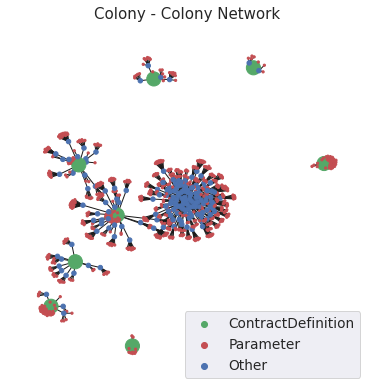

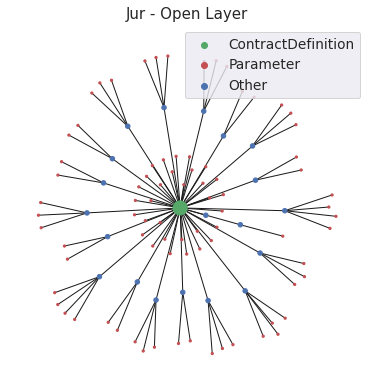

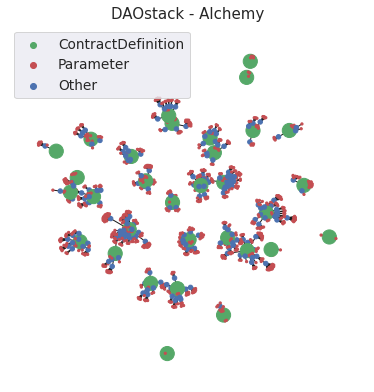

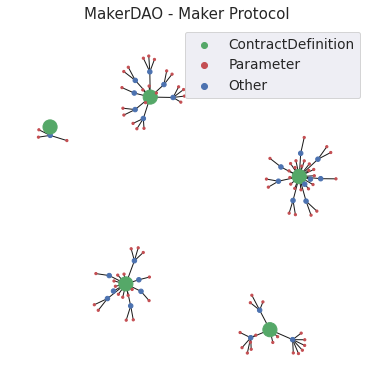

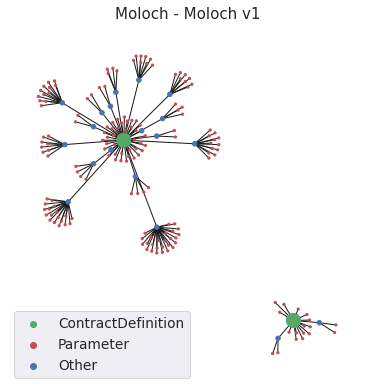

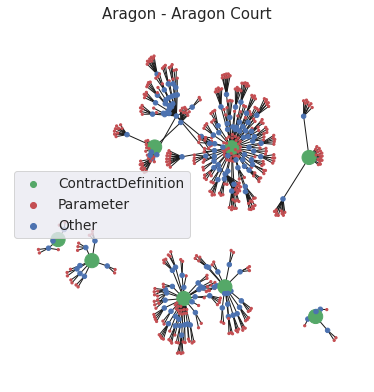

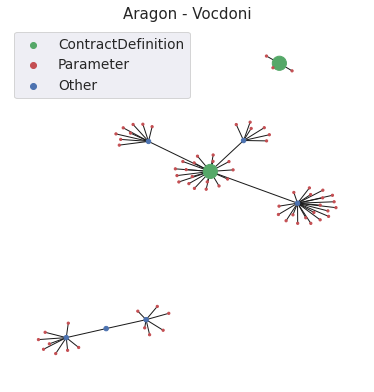

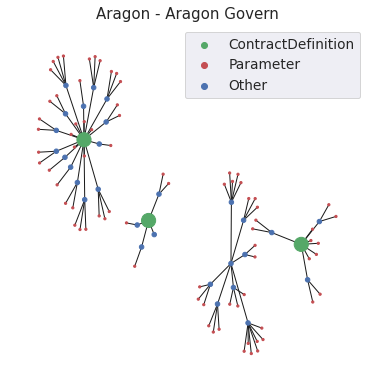

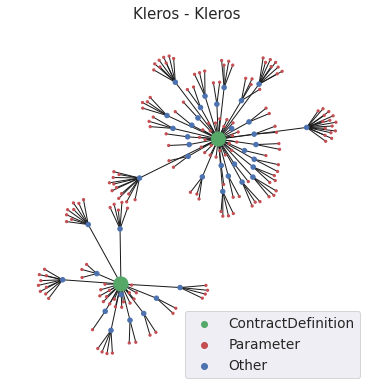

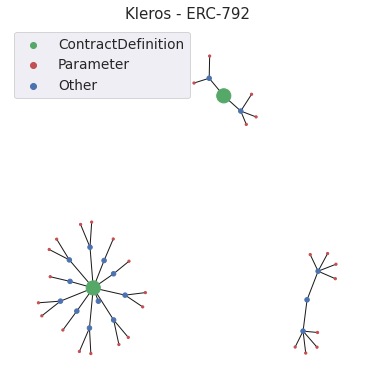

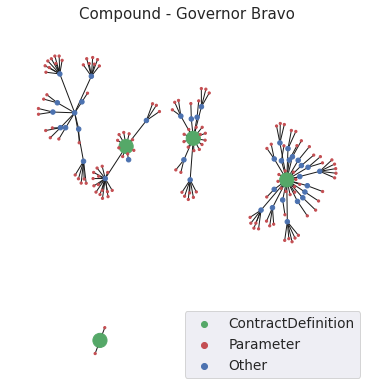

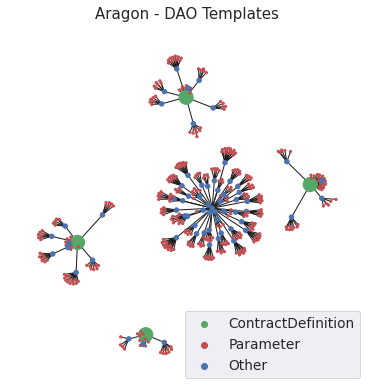

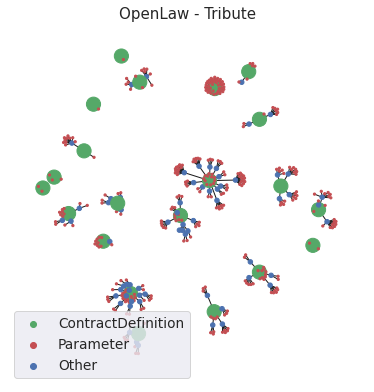

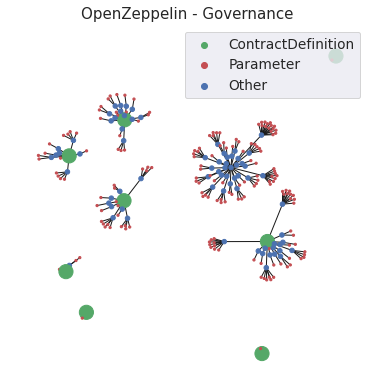

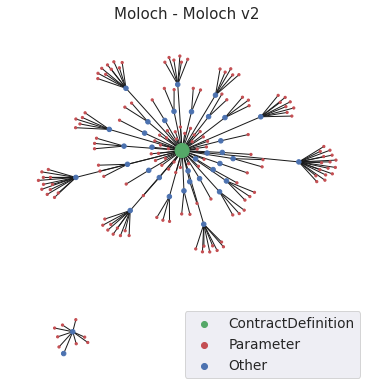

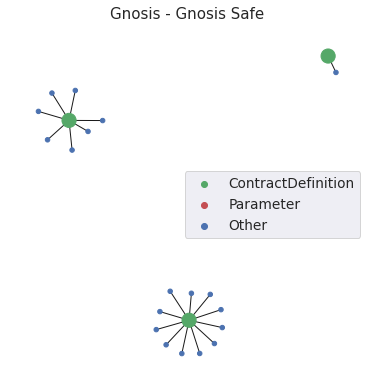

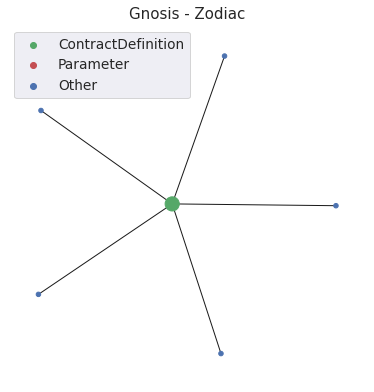

In [116]:
import networkx as nx

# TODO: show only functions, or or at least not modifiers or events
# TODO: figure out why some contracts don't show up as such
# TODO: add directional inheritance relationships

for project in df_objects['project'].unique():
    # Define the nodes
    df_o = df_objects[df_objects['project'] == project][['object_name', 'contract', 'type', 'visibility', 'inheritance', 'hand_coding']].rename(columns={'object_name': 'name'})
    df_p = df_params[df_params['project'] == project][['parameter_name', 'object_id']].rename(columns={'parameter_name': 'name'})

    # Define the edges
    df_c = df_o[df_o['type'] != 'ContractDefinition']['contract'].reset_index().set_index('contract').rename(columns={'id': 'from'})
    df_c = df_c.join(df_o[df_o['type'] == 'ContractDefinition'].reset_index().set_index('contract')).rename(columns={'id': 'to'})
    df_edges = df_p['object_id'].reset_index().rename(columns={'object_id': 'from', 'id': 'to'})
    df_edges = pd.concat([df_edges, df_c])

    G = nx.from_pandas_edgelist(df_edges, source='from', target='to')
    
    # Label the node attributes
    df_nodes = pd.concat([df_o, df_p])
    df_nodes['type'] = df_nodes['type'].apply(lambda x: x if not pd.isna(x) else 'Parameter')
    nx.set_node_attributes(G, pd.Series(df_nodes.name).to_dict(), 'name')
    nx.set_node_attributes(G, pd.Series(df_nodes.type).to_dict(), 'type')

    # Set node formats based on attributes
    color_dict = {'ContractDefinition': 'g', 'Parameter': 'r', 'Other': 'b'}
    size_dict = {'ContractDefinition': 200, 'Parameter': 5, 'Other': 20}
    colors = [color_dict.get(x[1], color_dict['Other']) for x in G.nodes.data('type')]
    sizes = [size_dict.get(x[1], size_dict['Other']) for x in G.nodes.data('type')]
    
    # Draw
    plt.figure()
    nx.draw(G, node_color=colors, node_size=sizes)
    ax = plt.gca()
    ax.set_title(project)

    # A hack to get color labels to show up
    for k, v in color_dict.items():
        plt.scatter([],[], c=v, label=k)
    plt.legend()
    
    